In [1]:
from scipy.signal import argrelextrema as arg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [2]:
data_dir = "../Data/20171114_NMR_full_data_"
pi2pulse = np.loadtxt(data_dir+"ch1.isf", delimiter=",")
pipulse = np.loadtxt(data_dir+"ch3.isf", delimiter=",")
signal = np.loadtxt(data_dir+"ch4.isf", delimiter=",")

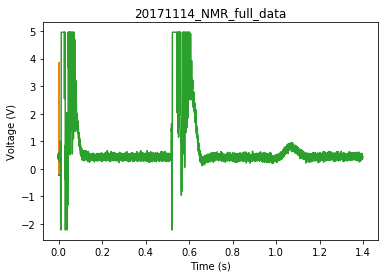

In [3]:
scale = 700
plt.title("20171114_NMR_full_data")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(pi2pulse[:,0],pi2pulse[:,1], label = "pi/2 pulse")
plt.plot(pipulse[:,0],pipulse[:,1], label = "pi pulse")
plt.plot(scale*signal[:,0],scale*signal[:,1], label = "signal");

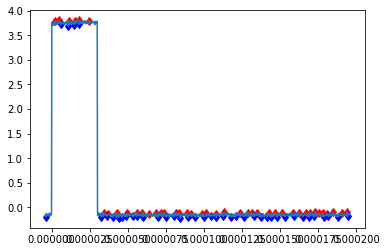

In [4]:
OO = 11
how_many = 1000
max_inds = arg(pi2pulse[:how_many,1], np.greater, order=OO)
min_inds = arg(pi2pulse[:how_many,1], np.less, order=OO)
plt.plot(pi2pulse[max_inds,0], pi2pulse[max_inds,1], 'rd')
plt.plot(pi2pulse[min_inds,0], pi2pulse[min_inds,1], 'bd')
plt.plot(pi2pulse[:how_many,0],pi2pulse[:how_many,1], label = "pi/2 pulse");

In [5]:
##Define t0 to be the end of the pi/2 pulse
t0_ind = min_inds[0][5]
t0 = pi2pulse[t0_ind, 0]

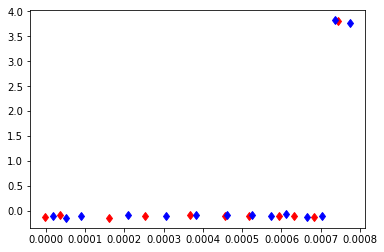

In [6]:
OO = 160
how_few = 3000
how_many = 7000
max_inds = arg(pipulse[how_few:how_many,1], np.greater, order=OO)
min_inds = arg(pipulse[how_few:how_many,1], np.less, order=OO)
plt.plot(pipulse[max_inds,0], pipulse[max_inds,1], 'rd')
plt.plot(pipulse[min_inds,0], pipulse[min_inds,1], 'bd');
# plt.plot(pipulse[how_few:how_many,0],pipulse[how_few:how_many,1], label = "pi/2 pulse");

In [7]:
#calculating the spacing between the pulses
tau_ind = min_inds[0][-2]
tau = pipulse[tau_ind, 0]

In [8]:
tau-t0

0.00070439999999999999

The separation between the two peaks is about 704 $\mu$s. We set this in SRS to be 700 $\mu$ s so this is within the uncertainty that we set.

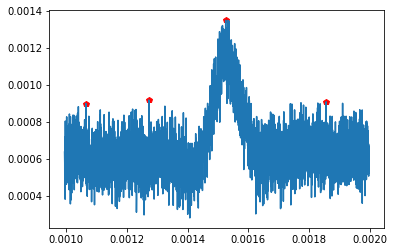

In [9]:
sig_new = signal[5000:,]
max_inds = arg(sig_new[:,1], np.greater, order=600)
plt.plot(sig_new[max_inds,0], sig_new[max_inds, 1], 'rp')
plt.plot(sig_new[:,0],sig_new[:,1], label = "signal");

In [10]:
echo_t = sig_new[max_inds[0][2],0]
echo_t -t0

0.0014928000000000001

The maximum amplitude of the echo occurs at 1,493 $\mu$ s.

In [11]:
(echo_t-t0)/tau

2.0255088195386701

The echo is still in the correct space!! Whoot whoot!

#### Time Uncertainty

In [12]:
signal_1 = np.loadtxt(data_dir+"ch4.isf", delimiter=",")
signal_2 = np.loadtxt("../Data/20171114_NMR_data_2_ch4.isf", delimiter=",")
signal_3 = np.loadtxt("../Data/20171114_NMR_data_3_ch4.isf", delimiter=",")

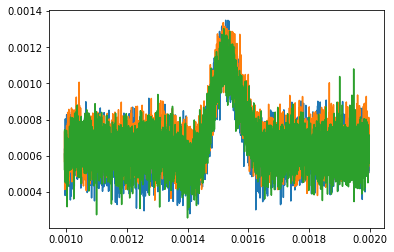

In [13]:
endcap = 5000
plt.plot(signal_1[endcap:,0], signal_1[endcap:,1])
plt.plot(signal_2[endcap:,0], signal_2[endcap:,1])
plt.plot(signal_3[endcap:,0], signal_3[endcap:,1])

0.0014928000000000001

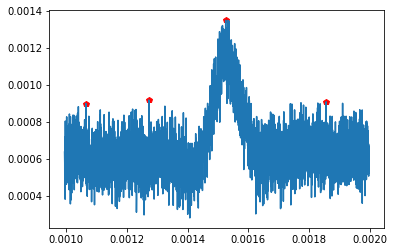

In [14]:
sig_new = signal_1[5000:,]
max_inds = arg(sig_new[:,1], np.greater, order=600)
plt.plot(sig_new[max_inds,0], sig_new[max_inds, 1], 'rp')
plt.plot(sig_new[:,0],sig_new[:,1], label = "signal")
echo_t = sig_new[max_inds[0][2],0]
echo_t -t0

0.0014851999999999999

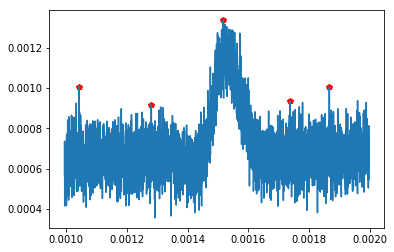

In [15]:
sig_new = signal_2[5000:,]
max_inds = arg(sig_new[:,1], np.greater, order=600)
plt.plot(sig_new[max_inds,0], sig_new[max_inds, 1], 'rp')
plt.plot(sig_new[:,0],sig_new[:,1], label = "signal")
echo_t = sig_new[max_inds[0][2],0]
echo_t -t0

0.0014863999999999999

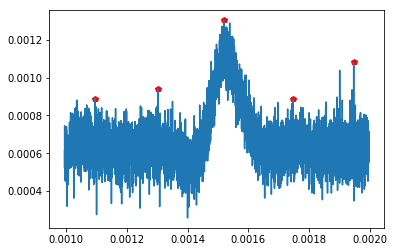

In [16]:
sig_new = signal_3[5000:,]
max_inds = arg(sig_new[:,1], np.greater, order=600)
plt.plot(sig_new[max_inds,0], sig_new[max_inds, 1], 'rp')
plt.plot(sig_new[:,0],sig_new[:,1], label = "signal")
echo_t = sig_new[max_inds[0][2],0]
echo_t -t0

In [17]:
peaks = [0.0014928000000000001, 0.0014851999999999999, 0.0014863999999999999]

In [18]:
##Uncertainty is half the difference between min and max
(0.0014928000000000001 - 0.0014851999999999999)/2

3.8000000000000924e-06